![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
#Uso de la Funcion describe para hacer el analisis
bikes.groupby('season').total.mean().describe()

count      4.000000
mean     191.250013
std       51.994766
min      116.343261
25%      178.327037
50%      207.119834
75%      220.042810
max      234.417124
Name: total, dtype: float64

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [7]:
#Uso de la Funcion describe para hacer el analisis
bikes.groupby('hour').total.mean().describe()

count     24.000000
mean     190.742045
std      133.245822
min        6.407240
25%       70.979121
50%      211.895604
75%      256.828399
max      468.765351
Name: total, dtype: float64

### Análisis de las Celdas 1.1 y 1.2

* Celda 1.1: 

Se puede observar de la variable _Season_ que el valor máximo  es de 234.41, que su mínimo es de 116.34, Su promedio es de 191.25. Se puede ver además que su primer cuartil es de 178.32 y el tercero es de 220.04. 
 
* Celda 1.2:  

Se puede observar de la variable _hour_ que el valor máximo es de 468.76, que su mínimo es de 6.40, Su promedio es de 190.74. Se puede ver además que su primer cuartil es de 70.97 y el tercero es de 256.82. 

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

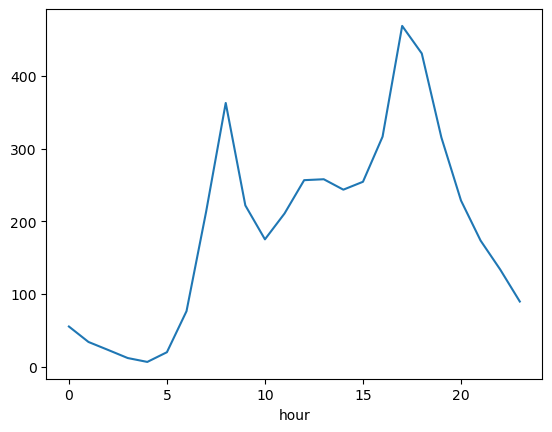

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

count     24.000000
mean     114.642351
std       83.500331
min        3.336634
25%       39.117257
50%      123.498253
75%      159.508772
max      283.456140
Name: total, dtype: float64

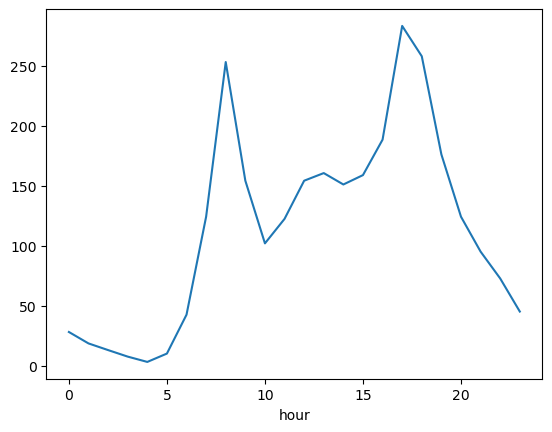

In [9]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes.season == 1].groupby('hour').total.mean().plot()
bikes[bikes.season == 1].groupby('hour').total.mean().describe()

count     24.000000
mean     234.193830
std      159.471610
min        8.087719
25%       91.504386
50%      253.793860
75%      307.223684
max      565.385965
Name: total, dtype: float64

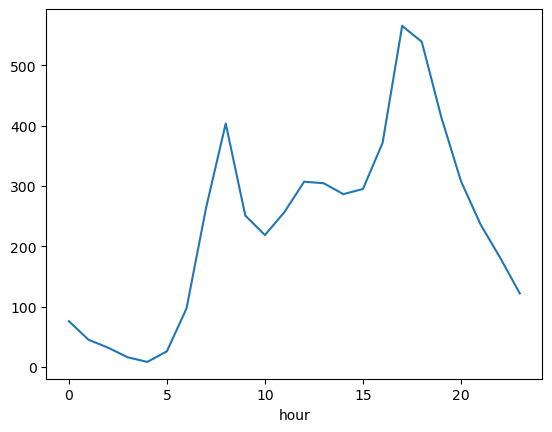

In [10]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes.season == 3].groupby('hour').total.mean().plot()
bikes[bikes.season == 3].groupby('hour').total.mean().describe()

### Análisis de las Celdas 2.2 y 2.3

* Celda 2.2:  

Se puede observar que en invierno el promedio mínimo de las bicicletas rentadas es de 3.33 entre 4 y 5 horas, Mientras que el máximo esta 283.45 entre las 17 y 18 horas. En promedio de rentaron 114.64 bicicletas. 

* Celda 2.3:   

Se puede observar que en verano el promedio mínimo de las bicicletas rentadas es de 8.08 entre 4 y 5 horas, Mientras que el máximo esta 565.38 entre las 17 y 18 horas. En promedio de rentaron 234.19 bicicletas. 

Con los anteriores resultados se puede notar que en verano el uso de las bicicletas es casi del doble que en invierno. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [11]:
# Celda 3
from sklearn.linear_model import LinearRegression

print(bikes.dtypes) 
X_lr =  bikes[['season', 'hour']]
Y_lr = bikes['total']

modeloRL= LinearRegression()
modeloRL.fit(X_lr,Y_lr)
print(f'CoeficientesLR: {modeloRL.coef_}')


season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
total           int64
hour            int64
dtype: object
CoeficientesLR: [26.95130851 10.52129824]


In [12]:
Y_lr.describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: total, dtype: float64

### Interpretación de los coeficientes
Los coeficientes de un modelo de regresión lineal son una medida de la relación entre las variables predictoras y la variable de respuesta, y se utilizan para entender cómo cambia la variable de respuesta cuando cambian las variables predictoras. 
En este caso los coeficientes fueron 26.95130851 y 10.52129824 lo que indica que la predicicon total variaria 26.95 por cada unidad en la variable _season_ y de igual forma variaria 10.52 por cada unidad de la variable _hour_.

### ¿Cuáles son las limitaciones de la regresión lineal en este caso?

La regresión lineal tiene algunas limitaciones que es importante tener en cuenta al aplicarla a un conjunto de datos, especialmente en el caso de este modelo de regresión lineal que utiliza la variable "season" como una variable categórica. Algunas de estas limitaciones incluyen: 

Si la relación no es lineal, el modelo de regresión lineal puede no ser adecuado. 
Si la varianza no es constante, se dice que hay heterocedasticidad y el modelo de regresión lineal puede no ser adecuado.
Si los errores no se distribuyen normalmente, el modelo de regresión lineal puede no ser adecuado.

En el caso específico de este modelo de regresión lineal, otra limitación es que la variable "season" es una variable categórica que tiene valores discretos (1, 2, 3 y 4), lo que puede dificultar la interpretación del coeficiente asociado a esta variable. Además, es posible que haya otras variables relevantes que no se están considerando en el modelo y que podrían estar influyendo en la variable de respuesta "total".

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [13]:
# Celda 4
X =  bikes[['season', 'hour']]
y = (bikes.total > 145).astype(int) ## Asumimos la mediana del total como 145

# Definición de parámetros y criterios de parada
max_depth = 6
num_pct = 10
max_features = None
min_gain=0.001

i=0 
j= 1
print(X.columns[i])
print(X.columns[j])


splits = np.percentile(X.iloc[:,j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits


season
hour


array([ 0.,  2.,  4.,  7.,  9., 12., 14., 16., 19., 21.])

In [14]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [15]:
 
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_


In [16]:

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split


In [17]:


# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

tree_grow(X, y, level=0, min_gain=0.001, max_depth= max_depth , num_pct=10)


{'y_pred': 0,
 'y_prob': 0.49917340191036,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 0.16178755449047394,
 'sl': {'y_pred': 0,
  'y_prob': 0.0942714126807564,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 0.06425451863089747,
  'sl': {'y_pred': 0,
   'y_prob': 0.026106335561922954,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 0.0027878761479700337,
   'sl': {'y_pred': 0,
    'y_prob': 0.010796723752792257,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 0.0008089140964271449},
   'sr': {'y_pred': 0,
    'y_prob': 0.11816192560175055,
    'level': 3,
    'split': [0, 3.0],
    'n_samples': 455,
    'gain': 0.009214309359181827,
    'sl': {'y_pred': 0,
     'y_prob': 0.05240174672489083,
     'level': 4,
     'split': [0, 2.0],
     'n_samples': 227,
     'gain': 0.004655188204359839,
     'sl': {'y_pred': 0,
      'y_prob': 0.008695652173913044,
      'level': 5,
      'split': -1,
      'n_samples': 1

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [18]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 24)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=100, scoring='accuracy').mean())


(0.8416148487937478, 5)

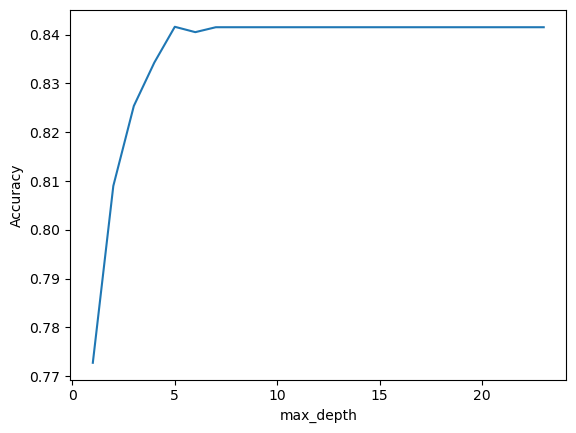

In [19]:
# Gráfica max_depth versus RMSE (error del modelo)
import matplotlib.pyplot as plt
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

In [20]:
# división los datos en conjuntos de entrenamiento y validación
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# max_depth=2 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=1)

In [21]:
Score_train = clf.score(X_train, y_train)
print(f'La presición del modelo de árbol de clasificación es con los datos de Train es: {Score_train}')

Score_test = clf.score(X_test, y_test)
print(f'La presición del modelo de árbol de clasificación es con los datos de Test es: {Score_test}')


La presición del modelo de árbol de clasificación es con los datos de Train es: 0.8095433977786919
La presición del modelo de árbol de clasificación es con los datos de Test es: 0.8076816031171723


El modelo entrenado tiene una presición del 63,34% para las dos muestras, tanto la de entrenamiento como la de validacion.


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [22]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [23]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [24]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [25]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [26]:
#Modelo de Arbol de decisión

modelo_ArbolDesicion = DecisionTreeClassifier(max_depth=5, random_state=1)
modelo_ArbolDesicion.fit(X_train, y_train)

y_pred = modelo_ArbolDesicion.predict(X_test)
accuracy_modelo_ArbolDesicion = accuracy_score(y_test, y_pred)
f1_modelo_ArbolDesicion = f1_score(y_test, y_pred)

print(f'Accuracy del modelo de árbol de decisión: {accuracy_modelo_ArbolDesicion:.3f}')
print(f'F1-Score del modelo de árbol de decisión: {f1_modelo_ArbolDesicion:.3f}')


Accuracy del modelo de árbol de decisión: 0.637
F1-Score del modelo de árbol de decisión: 0.662


In [27]:
#Modelo de Regresión logistica

modelo_RegresionLogistica = LogisticRegression(random_state=1)
modelo_RegresionLogistica.fit(X_train, y_train)

y_pred = modelo_RegresionLogistica.predict(X_test)
accuracy_modelo_RegresionLogistica = accuracy_score(y_test, y_pred)
f1_modelo_RegresionLogistica = f1_score(y_test, y_pred)

print(f'Accuracy del modelo de regresión logística: {accuracy_modelo_RegresionLogistica:.3f}')
print(f'F1-Score del modelo de regresión logística: {f1_modelo_RegresionLogistica:.3f}')

Accuracy del modelo de regresión logística: 0.615
F1-Score del modelo de regresión logística: 0.611


En este caso, aunque la diferencia es mínima  el modelo de árbol de decisión es mejor que el modelo de regresión logística, ya que tiene un valor más alto de Accuracy (0.637) y F1-Score (0.662) en comparación con el modelo de regresión logística que tiene un Accuracy de 0.615 y F1-Score de 0.611. Sin embargo, es importante tener en cuenta que la elección del modelo también depende de los objetivos específicos del problema y otras consideraciones, como el costo de los errores de clasificación y la interpretabilidad del modelo. Por lo tanto, se debe realizar una evaluación cuidadosa de los diferentes modelos antes de tomar una decisión final.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [28]:
# Celda 7
from sklearn.ensemble import BaggingClassifier, VotingClassifier

# Definición de los modelos
arbol_max = DecisionTreeClassifier(max_depth=5)
arbol_min= DecisionTreeClassifier(min_samples_leaf=5)
RegresionLogistica = LogisticRegression()

# Entrenamiento de los modelos y evaluación del rendimiento
for modelo_n in (arbol_max, arbol_min, RegresionLogistica):
    modelo_n.fit(X_train, y_train)
    y_pred = modelo_n.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(modelo_n.__class__.__name__, "Accuracy:", acc, "F1-Score:", f1)

# Creación del ensamble de modelos y evaluación del rendimiento
arbol_max_bagging1 = BaggingClassifier(arbol_max, n_estimators=100, random_state=1)
arbol_min_bagging2 = BaggingClassifier(arbol_min, n_estimators=100, random_state=1)
ensemble = VotingClassifier(estimators=[('arbol_max', arbol_max_bagging1), ('arbol_min', arbol_min_bagging2), ('RegresionLogistica',RegresionLogistica)], voting='hard')
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Ensamblaje Accuracy:", acc, "F1-Score:", f1)


DecisionTreeClassifier Accuracy: 0.6373333333333333 F1-Score: 0.6616915422885573
DecisionTreeClassifier Accuracy: 0.5393333333333333 F1-Score: 0.5444957152274226
LogisticRegression Accuracy: 0.6146666666666667 F1-Score: 0.6110363391655451
Ensamblaje Accuracy: 0.658 F1-Score: 0.6595885865958858


Con los resultados obtenidos de cada uno de los modelos se puede ver que los resultados de Accurancy y F1-Score son muy cercanos, lo que se puede observar es que el ensamblaje mejora el desempeño del modelo ya que los resultados de los modelos por separado eran muy parecidos y este ensamblaje los obtimiza mucho mas.


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [29]:
# Celda 8
# Definición de los modelos base
arbol_max_VP = DecisionTreeClassifier(max_depth=7, random_state=1)
arbol_min_VP = DecisionTreeClassifier(min_samples_leaf=50, random_state=1)
RegresionLogistica_VP = LogisticRegression(random_state=1)

In [30]:


# Definición de los modelos de ensamble
arbol_max_VP = BaggingClassifier(base_estimator=arbol_max_VP, n_estimators=100, random_state=1)
arbol_min_VP= BaggingClassifier(base_estimator=arbol_min_VP, n_estimators=100, random_state=1)
RegresionLogistica_VP = BaggingClassifier(base_estimator=RegresionLogistica_VP, n_estimators=100, random_state=1)

# Entrenamiento de los modelos base y evaluación de su desempeño
arbol_max_VP.fit(X_train, y_train)
arbol_min_VP.fit(X_train, y_train)
RegresionLogistica_VP.fit(X_train, y_train)

arbol_max_VP_pred = arbol_max_VP.predict(X_test)
arbol_min_VP_pred = arbol_min_VP.predict(X_test)
RegresionLogistica_VP_pred = RegresionLogistica_VP.predict(X_test)

print("arbol_max_VP (max_depth=7) Accuracy:", accuracy_score(y_test, arbol_max_VP_pred),
      "F1-Score:", f1_score(y_test, arbol_max_VP_pred))
print("arbol_min_VP (min_samples_leaf=50) Accuracy:", accuracy_score(y_test, arbol_min_VP_pred),
      "F1-Score:", f1_score(y_test, arbol_min_VP_pred))
print("RegresionLogistica_VP Accuracy:", accuracy_score(y_test, RegresionLogistica_VP_pred),
      "F1-Score:", f1_score(y_test, RegresionLogistica_VP_pred))

# Ensamble de modelos por Votación ponderada
from sklearn.ensemble import VotingClassifier

models = [('arbol_max_VP', arbol_max_VP), ('arbol_min_VP', arbol_min_VP), ('RegresionLogistica_VP', RegresionLogistica_VP)]

voting_weighted = VotingClassifier(estimators=models, voting='soft', weights=[0.4, 0.4, 0.2])
voting_weighted.fit(X_train, y_train)
weighted_pred = voting_weighted.predict(X_test)

print("Ensamble ponderado Accuracy:", accuracy_score(y_test, weighted_pred),
      "F1-Score:", f1_score(y_test, weighted_pred))

arbol_max_VP (max_depth=7) Accuracy: 0.664 F1-Score: 0.6666666666666666
arbol_min_VP (min_samples_leaf=50) Accuracy: 0.664 F1-Score: 0.6648936170212766
RegresionLogistica_VP Accuracy: 0.6213333333333333 F1-Score: 0.6172506738544474
Ensamble ponderado Accuracy: 0.6633333333333333 F1-Score: 0.6640053226879573


Con los resultados obtenidos de cada uno de los modelos  y aplicando una Votacion ponderada se puede ver que los resultados de Accurancy y F1-Score son muy cercanos y mejoran con el ensamble,  haciendo que mejore el desempeño del modelo.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9
En ambos casos de ensambles mejoraron significativamente los resultados de los modelos individuales, tanto en Accuracy como en F1-Score. 
Sin embargo, se observa que el ensamble con votación ponderada obtuvo resultados ligeramente mejores que el ensamble con votación
 mayoritaria.

La ventaja de la votación mayoritaria es su simplicidad y facilidad de implementación, ya que simplemente se basa en la frecuencia 
de votos de los modelos individuales. Sin embargo, puede presentar cierta dificultad en el manejo de empates y no toma en cuenta 
el rendimiento individual de cada modelo en la votación.

mientras que la votación ponderada permite dar un peso diferente a cada modelo individual en la votación, dependiendo de su 
rendimiento en la fase de entrenamiento, lo que puede llevar a mejores resultados en general. Sin embargo, puede ser más compleja 
de implementar y requiere de un proceso de ajuste de pesos para obtener los mejores resultados posibles.